# <center>**Course Project 2** </center>

**Policy**

1. You may use your own or any software packages/module/codes to do this project. 
2. The project has to be done in groups of 2-4 persons each working together to complete all the tasks. The team can be the same as the Project 1 or re-formed.  
4. The report should be no more than 20 pages, including one page describing the contributions of each of the members in the group, figures, tables and codes. 
5. You are encouraged to do beyond the described tasks along with the central topic. Quality and innovative work will be greatly rewarded. 


Consider a penetration of a bullet onto a plate, as shown in the following figure. 

<div>
<br>
<img src="../../../images/Penetration.png" width="300"/>
<br>
[A bullet penetrated a circular plate]
</div>

Study the paper entitle "Real-time prediction of projectile penetration to laminates by training machine learning models with finite element solver as the trainer" given in the file holder of the course website. The dataset for this study was generated from a large number of FEM analyses for a real research project, and it is given also in the file folder. The Python code for the neural network is given there as Neural_network_FEA.py. Note that this neural network model is for predicting the entire time history of the velocity of the bullet, before and after the penetration. Before doing your tasks before, you should try to repeat the work on NN first using exactly the same dataset and codes.  

1. Establish a new NN model to predict only the residual velocity of the bullet, using the given dataset, aiming to outperform the one in the paper. Note that for the penetrated cases, the residual velocity will still be positive. For the not-penetrated cases, it is negative because the bullet is bounced back. 

2. Establish any other alternative model to repeat Task 1. 

3. Discuss on what type of ML model work best for this type of data.

You may use any existing 3rd party ML module or your own code to get this tasks done. 

Please submit both codes and reports online by the deadline. No extension will be given, because this is the final project. 

Epoch 1/1000
81/81 - 5s - loss: 104854.6562 - val_loss: 101514.8984 - 5s/epoch - 61ms/step
Epoch 2/1000
81/81 - 0s - loss: 59476.8867 - val_loss: 33773.5078 - 313ms/epoch - 4ms/step
Epoch 3/1000
81/81 - 0s - loss: 32410.1055 - val_loss: 30603.7520 - 241ms/epoch - 3ms/step
Epoch 4/1000
81/81 - 0s - loss: 29816.6562 - val_loss: 27998.9941 - 272ms/epoch - 3ms/step
Epoch 5/1000
81/81 - 0s - loss: 27563.9570 - val_loss: 25710.7363 - 321ms/epoch - 4ms/step
Epoch 6/1000
81/81 - 0s - loss: 24990.8223 - val_loss: 22970.4668 - 250ms/epoch - 3ms/step
Epoch 7/1000
81/81 - 0s - loss: 22096.0566 - val_loss: 19815.0957 - 237ms/epoch - 3ms/step
Epoch 8/1000
81/81 - 0s - loss: 18425.8242 - val_loss: 15832.6816 - 234ms/epoch - 3ms/step
Epoch 9/1000
81/81 - 0s - loss: 13828.5361 - val_loss: 10871.6016 - 324ms/epoch - 4ms/step
Epoch 10/1000
81/81 - 1s - loss: 8651.5215 - val_loss: 6386.3823 - 524ms/epoch - 6ms/step
Epoch 11/1000
81/81 - 0s - loss: 4852.9443 - val_loss: 4094.0613 - 353ms/epoch - 4ms/step
E

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

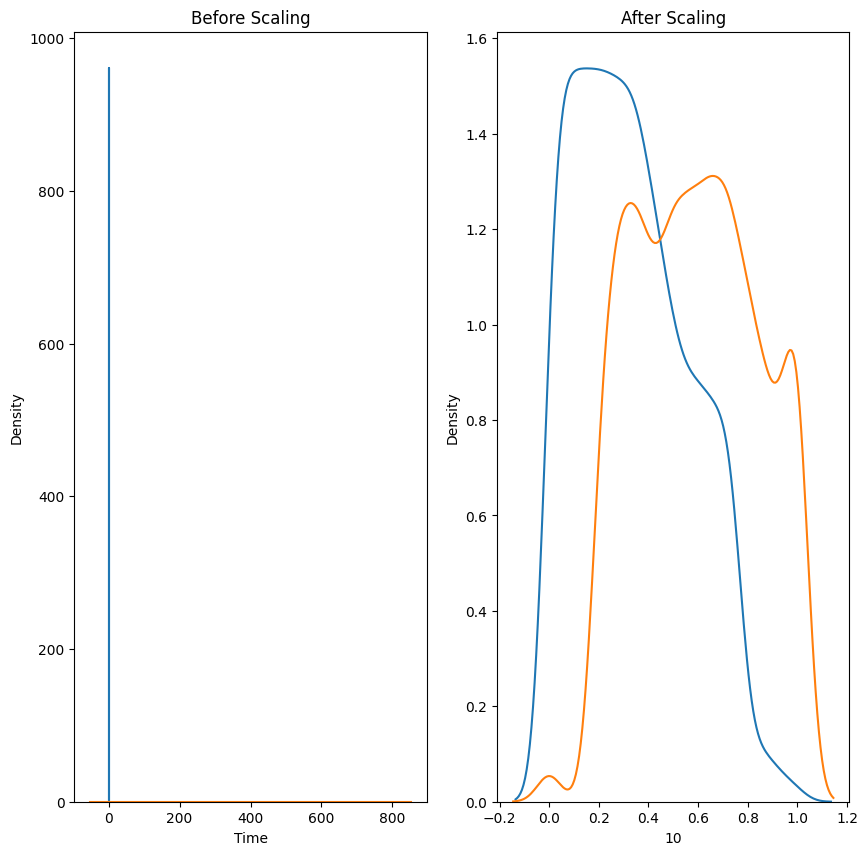

In [1]:
#Thesis code Neural Network- Finite Element Dataset
#Author- Pushkar Wadagbalkar
#************************************************************************************

#importing all the required python libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


#importing training dataset and target files
dataset = pd.read_csv('./Finite_element_entire_data_set.csv')
X = dataset.iloc[:, 0:5].values
dataset2 = pd.read_csv('./Finite_element_entire_data_set.csv')
Y = dataset2.iloc[:, 5].values

#Column Transfer and one hot encoding for categorical features
ct=ColumnTransformer(transformers=[("oh",OneHotEncoder(),[2,3,4])],remainder="passthrough")
X = ct.fit_transform(X)
X = np.asarray(X).astype('float32')

fig, (ob1,ob2)= plt.subplots(ncols=2 , figsize= (10,10))
ob1.set_title('Before Scaling')
sns.kdeplot(dataset['Time'],ax=ob1)
sns.kdeplot(dataset['Velocity'],ax=ob1)

#Feature scaling using MinMaxScaler
sc = preprocessing.MinMaxScaler(feature_range=(0,1))
X[:,[10,11]] = sc.fit_transform((X[:, [10,11]]))
Z= pd.DataFrame(X)

#Plotting the KDE plot for data after feature scaling
scaled = Z.iloc[:,:]
ob2.set_title('After Scaling')
sns.kdeplot(scaled[10],ax=ob2)
sns.kdeplot(scaled[11],ax=ob2)

#Splitting the training data from the unseen inputs for which predictions are to be made
Train= Z.iloc[0:3221]
Input= Z.iloc[3221::]

#Splitting the data into training, validation and testing datasets
train_x, test_x, train_y, test_y = train_test_split(Train, Y, test_size=0.20, random_state=415)
validation_x, testing_x, validation_y, testing_y = train_test_split(test_x,test_y,test_size=0.50, random_state=415)

#importing and implementing Neural network regression model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))


model.add(Dense(1,))
model.compile( loss='mse', optimizer='adam')

#Compiling the model with early stopping algorithm
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

#Computing training and validation loss for the network
history= model.fit(train_x,train_y,validation_data=(validation_x,validation_y),callbacks=[monitor],verbose=2,epochs=1000)
history_dict=history.history
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']

#Getting predictions for training dataset
y_train_pred =model.predict(train_x)
#Getting predictions for validation dataset
y_validation_pred= model.predict(validation_x)
#Getting predictions for testing dataset
final_result= model.predict(testing_x)
#Getting predictions for unseen inputs
Unseen_result = model.predict(Input)

#Calculating relative error for validation dataset
Error= ((validation_y-y_validation_pred)/validation_y)

def average(Error):
    return sum(abs(Error))/len(Error)

Relative_Error= average(Error)

#Calculating relative error for testing dataset
Error_testing= ((testing_y-final_result)/testing_y)

def average(Error_testing):
    return sum(abs(Error_testing))/len(Error_testing)

Testing_Relative_Error= average(Error_testing)

In [2]:
# Import the necessary libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import csv
import pandas as pd
import random
import time

# Open file utilizing pandas module for data frames
df=pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Setup X array and y label array using pandas manipulation (2d, 1d)
X = df.iloc[:, 0:5].values
y = df.iloc[:, 5].values

# Preform OHE
onehot = pd.get_dummies(df,drop_first=True)
X = onehot.to_numpy()
Y = X[:,X.shape[1]-1]
X = np.delete(X,X.shape[1]-1,1)
# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


# Train Data
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

# Predictions and testing/training based on OHE
#y_predlin = svc.predict(X_test)# Get predicted test value
#y_predtrlin = svc.predict(X_train) # Get predicted train value
y_predlin = clf.predict(X_train)
y_predtestlin = clf.predict(X_test)
print('Linear training OHE: ', y_predlin)
print('Linear testing OHE: ', y_predtestlin)

Linear training OHE:  [0. 0. 0. ... 0. 0. 0.]
Linear testing OHE:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# Import the necessary libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import csv
import pandas as pd
import random
import time

# Open file utilizing pandas module for data frames
df=pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Setup X array and y label array using pandas manipulation (2d, 1d)
X = df.iloc[:, 0:5].values
y = df.iloc[:, 5].values

# Preform OHE for data importation using sklearn module
ohe = sklearn.preprocessing.OneHotEncoder()
dfhot = ohe.fit_transform(X).toarray()
#yhot= ohe.fit_transform(y).toarray()
onehot = pd.get_dummies(df,drop_first=True)
X = onehot.to_numpy()
Y = X[:,X.shape[1]-1]
X = np.delete(X,X.shape[1]-1,1)
# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

# Define parameters
X_test = dfhot[int(-3221*.10):]
X_train = dfhot[:int(3221*.90)]
y_test = y[int(-3221*.10):]
y_train = y[:int(3221*.90)]
y_test = y_test.ravel()
y_train = y_train.ravel()
print(y.shape)
print(y_train.shape)
print(X_train.shape)

# Train Data
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

# Predictions and testing/training based on OHE
#y_predlin = svc.predict(X_test)# Get predicted test value
#y_predtrlin = svc.predict(X_train) # Get predicted train value
y_predlin = clf.predict(X_train)
y_predtestlin = clf.predict(X_test)
print('Linear training OHE: ', y_predlin)
print('Linear testing OHE: ', y_predtestlin)



(3221,)
(2898,)
(2898, 1192)


ValueError: Unknown label type: (array([200.        , 141.0924377 ,  64.62317657, ..., 178.8565979 ,
       174.8491821 , 169.0614929 ]),)